In [8]:
import pandas as pd
from ast import literal_eval

today = "2019-07-27"

df = pd.read_csv(f"out/valid-{today}-test.csv")
df["shape1"] = df.shape1.apply(literal_eval)
df["shape2"] = df.shape2.apply(literal_eval)
df["total_params1"] = df.shape1.apply(lambda x: x[0] * x[1])
df["total_params2"] = df.shape2.apply(lambda x: x[0] * x[1])
df["same"] = df.actual_fastest == df.predicted_fastest
df.tail()

,shape1,shape2,actual_fastest,predicted_fastest,mode,constant,fft_time,direct_time,pred_direct_time,pred_fft_time,total_params1,total_params2,same
995,"(8, 1)","(95, 148)",fft,fft,valid,"[0.34633506077546283, 4483.810300140974]",0.000713,0.001692,120768.0,145256.506074,8,14060,True
996,"(3, 5)","(113, 6)",direct,fft,valid,"[0.34633506077546283, 4483.810300140974]",0.000238,0.000052,17250.0,8104.644805,15,678,False
997,"(12, 141)","(2, 103)",fft,fft,valid,"[0.34633506077546283, 4483.810300140974]",0.000345,0.000921,650754.0,25455.256120,1692,206,True
998,"(129, 33)","(9, 4)",fft,fft,valid,"[0.34633506077546283, 4483.810300140974]",0.000338,0.001473,177552.0,41939.261331,4257,36,True
999,"(64, 30)","(2, 17)",fft,fft,valid,"[0.34633506077546283, 4483.810300140974]",0.000274,0.000326,101660.0,23929.055712,1920,34,True


In [9]:
acc = (df.actual_fastest == df.predicted_fastest).sum() / len(df)
print(f"Predicted fastest method {100 * acc:0.2f}% of the time")

Predicted fastest method 67.70% of the time


In [10]:
wrong = df[~df.same]
wrong[["shape1", "shape2", "direct_time", "fft_time"]]

,shape1,shape2,direct_time,fft_time
0,"(19, 19)","(25, 42)",0.000648,0.000872
5,"(4, 87)","(4, 108)",0.000092,0.000349
6,"(96, 7)","(69, 1)",0.000195,0.000311
7,"(2, 44)","(11, 57)",0.000162,0.000241
12,"(3, 18)","(5, 47)",0.000064,0.000221
...,...,...,...,...
985,"(5, 3)","(25, 15)",0.000059,0.000214
988,"(9, 139)","(9, 2)",0.000041,0.000256
990,"(144, 11)","(2, 5)",0.000165,0.000258
991,"(2, 4)","(123, 17)",0.000176,0.000303


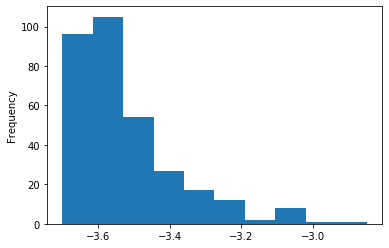

In [11]:
%matplotlib inline
import numpy as np
slow_times = wrong[["direct_time", "fft_time"]].max(axis="columns")
np.log10(slow_times).plot.hist(bins=10)